In [1]:
from read_data import read_history

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

In [2]:
generations = 500

In [3]:
history_csv_file = '../data/history_data.csv'
history_array = []

history_array = read_history(history_array, history_csv_file)

# for tau in range(0, 100):
#     for g in range(0, generations):
#         print(history_array[tau][g])

history_array

Importing completed, there are 100 history entries in total


[[{'Nc': '5', 'Ne': '0', 'Nd': '0', 'R': '0.8', 'dense': 'True'},
  {'Nc': '9',
   'Ne': '0',
   'Nd': '0',
   'R': '1.2031585694162432',
   'dense': 'True'},
  {'Nc': '10',
   'Ne': '1',
   'Nd': '0',
   'R': '1.3000511890677973',
   'dense': 'True'},
  {'Nc': '14',
   'Ne': '0',
   'Nd': '1',
   'R': '1.7750078933388354',
   'dense': 'True'},
  {'Nc': '17',
   'Ne': '0',
   'Nd': '0',
   'R': '2.286548803018697',
   'dense': 'False'},
  {'Nc': '18',
   'Ne': '1',
   'Nd': '0',
   'R': '2.006487660711714',
   'dense': 'True'},
  {'Nc': '21',
   'Ne': '2',
   'Nd': '0',
   'R': '2.1836313922950317',
   'dense': 'True'},
  {'Nc': '27',
   'Ne': '2',
   'Nd': '0',
   'R': '2.695064690310846',
   'dense': 'True'},
  {'Nc': '30',
   'Ne': '4',
   'Nd': '1',
   'R': '2.783334160716828',
   'dense': 'True'},
  {'Nc': '36',
   'Ne': '5',
   'Nd': '1',
   'R': '3.066534837305813',
   'dense': 'True'},
  {'Nc': '45',
   'Ne': '4',
   'Nd': '2',
   'R': '3.499763649963246',
   'dense': 'True'},


In [5]:
len(history_array)
# Contains 100 lists, each with 500 dicts, corresponding to tau and generations respectively

100

### Method 1: Plot critical points of f(x) = Nc vs Generations against Bifurcation Parameter 'Tau'

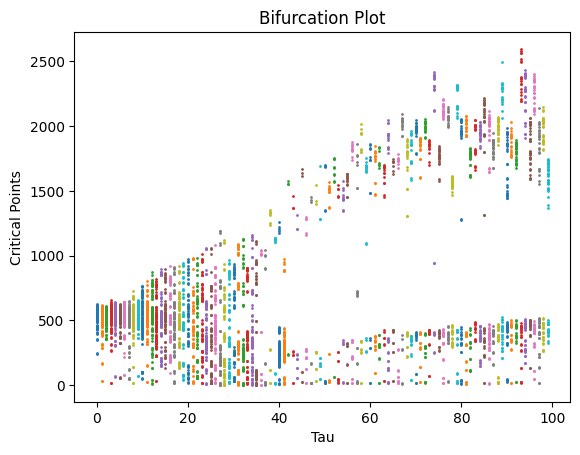

In [12]:
critical_points_by_tau = []
taus = []
final_value = []

for tau in range(0, 100):
    Nc_data = np.array([history_array[tau][i]['Nc'] for i in range(generations)]).astype(int)
    
    peaks, _ = find_peaks(Nc_data, prominence=1)
    peaks_values = Nc_data[peaks]
    troughs, _ = find_peaks(-Nc_data, prominence=1)
    troughs_values = Nc_data[troughs]
    final_value.append(Nc_data[-1])
    combined_values = np.concatenate((peaks_values, troughs_values))
    critical_points_by_tau.append(combined_values)
    taus.append(tau)

for tau in range(0, 100):
    y_values = critical_points_by_tau[tau]
    if y_values.size == 0:
        y_values = [final_value[tau]]
    x_values = [tau] * len(y_values)
    
    plt.scatter(x_values, y_values, s = 1)
    
plt.title('Bifurcation Plot')
plt.xlabel('Tau')
plt.ylabel('Critical Points')
plt.show()